In [1]:
import pandas as pd 
data = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)
data.head()

,Date,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands
0,2010-01-01,406.263,7.5246,74.31,786.0,559.153026
1,2010-02-01,424.263,7.4735,76.84,804.0,574.263740
2,2010-03-01,430.563,7.6902,73.17,810.3,562.691934
3,2010-04-01,453.063,7.4753,78.89,858.3,589.726417
4,2010-05-01,465.063,7.3749,85.75,871.8,632.397675


Plotly Way

In [7]:
# Obtain the label and feature from the original data
dataset = data[['BFP','Crude_Rands']]

# Print the number of observations
print("No. of observations:", dataset.shape[0])

# Graph the distribution of variables for the unsplit dataset
import plotly.express as px

fig = px.scatter(data, x="Crude_Rands", y="BFP", width=800, height=400)
fig.show()


#import graphing
#graphing.scatter_2D(dataset, 'BFP', 'Crude_Rands')

No. of observations: 147


Seaborn Way

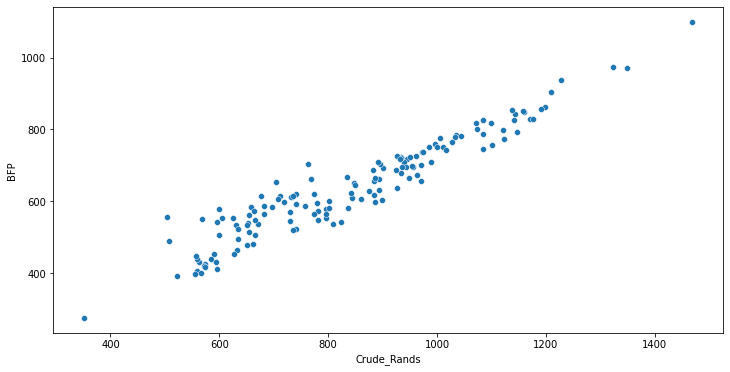

In [8]:
import seaborn as sns 
g = sns.scatterplot(data = data ,x='Crude_Rands', y='BFP')
g.figure.set_size_inches(12,6)


#sns.scatterplot(data = dataset, x='BFP', y='Oil_Rand')

#### Dataset split ratio comparison

In [9]:
from sklearn.model_selection import train_test_split
import graphing

# Split Dataset using different ratios 50:50, 60:40, 70:30, 80:20
train_5050, test_5050 = train_test_split(dataset, test_size=0.5, random_state=2)
train_6040, test_6040 = train_test_split(dataset, test_size=0.4, random_state=2)
train_7030, test_7030 = train_test_split(dataset, test_size=0.3, random_state=2)
train_8020, test_8020 = train_test_split(dataset, test_size=0.2, random_state=2)

# Add a column to each set to identify if a datapoint belongs to "train" or "test"
train_5050, test_5050 = train_5050.assign(Set="train"), test_5050.assign(Set="test")
train_6040, test_6040 = train_6040.assign(Set="train"), test_6040.assign(Set="test")
train_7030, test_7030 = train_7030.assign(Set="train"), test_7030.assign(Set="test")
train_8020, test_8020 = train_8020.assign(Set="train"), test_8020.assign(Set="test")

# Concatenate the "train" and "test" sets for each split so we can plot them on the same chart
df_5050 = pd.concat([train_5050, test_5050], axis=0)
df_6040 = pd.concat([train_6040, test_6040], axis=0)
df_7030 = pd.concat([train_7030, test_7030], axis=0)
df_8020 = pd.concat([train_8020, test_8020], axis=0)

# Plot each distribution for comparison
graphing.scatter_2D(df_5050, "Crude_Rands", "BFP", title="50:50 split", label_colour="Set", show=True)
graphing.scatter_2D(df_6040, "Crude_Rands", "BFP", title="60:40 split", label_colour="Set", show=True)
graphing.scatter_2D(df_7030, "Crude_Rands", "BFP", title="70:30 split", label_colour="Set", show=True)
graphing.scatter_2D(df_8020, "Crude_Rands", "BFP", title="80:20 split", label_colour="Set")

Seaborn Way

Text(0.5, 1.0, '80:20 Split')

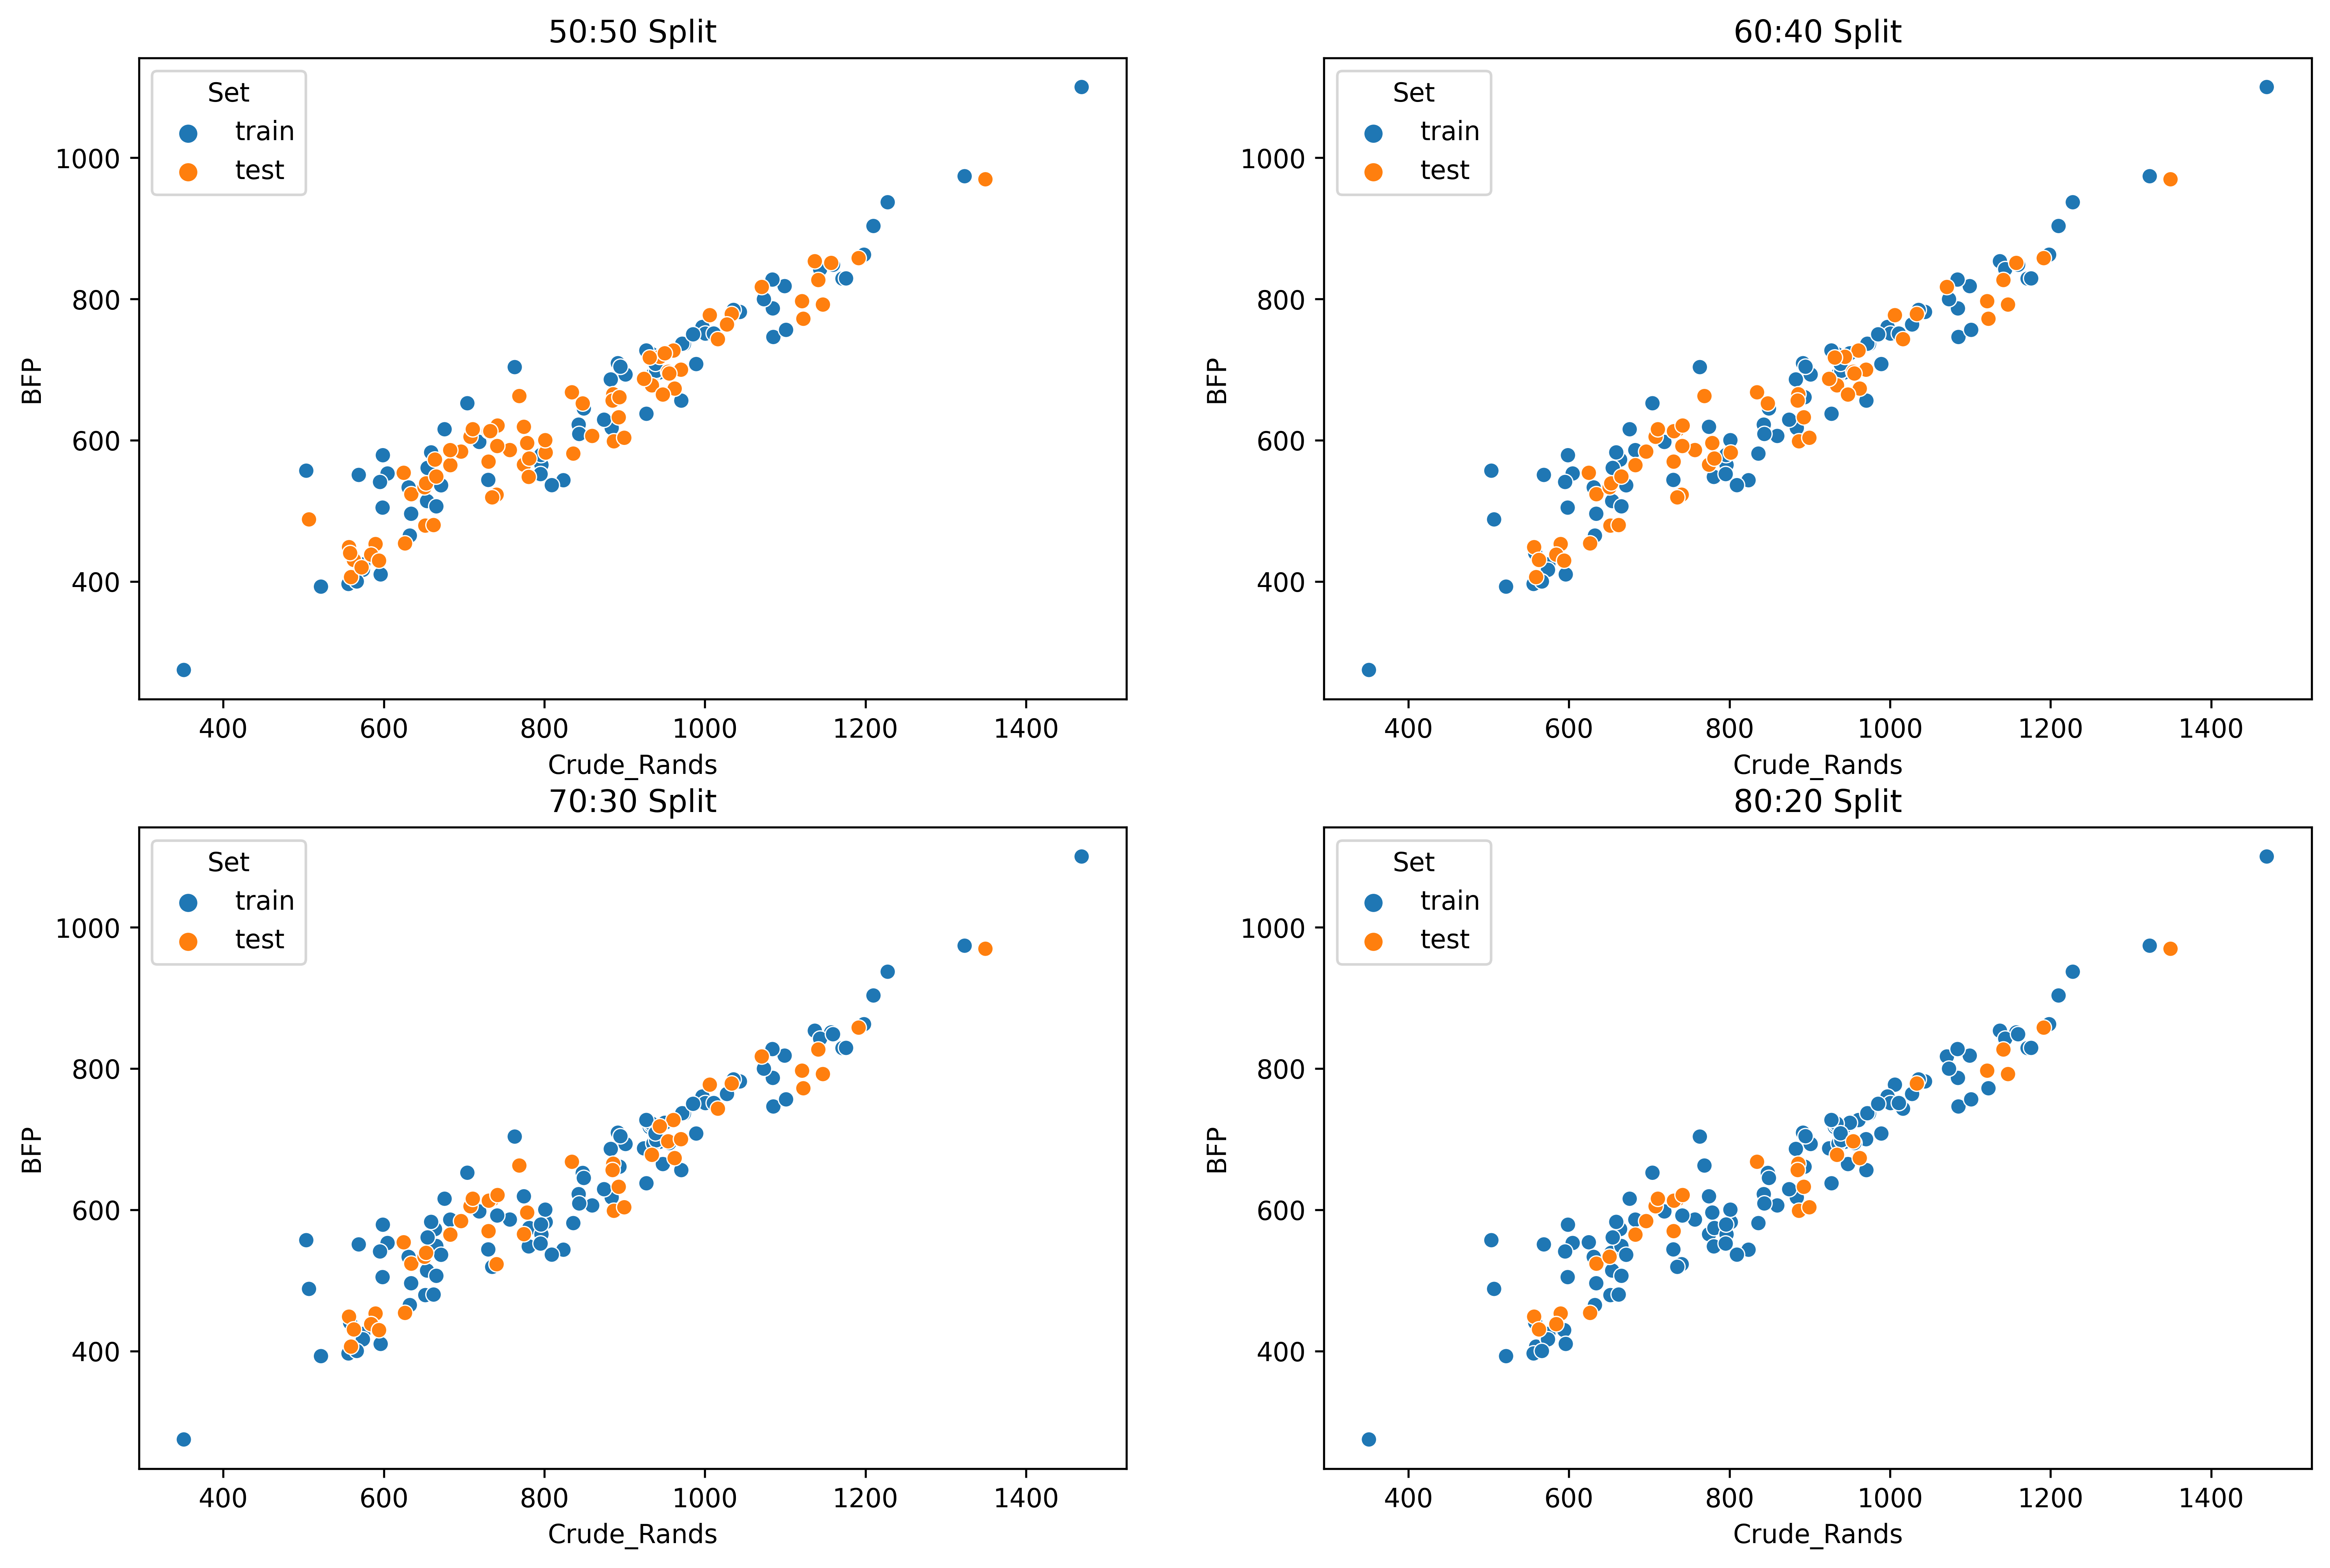

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15,10), dpi=480)


sns.scatterplot(data = df_5050, x= "Crude_Rands", y= "BFP", hue='Set', ax=axes[0,0])
axes[0,0].set_title('50:50 Split')

sns.scatterplot(data = df_6040, x= "Crude_Rands", y= "BFP", hue='Set',ax=axes[0,1])
axes[0,1].set_title('60:40 Split')

sns.scatterplot(data = df_7030, x= "Crude_Rands", y= "BFP",hue='Set', ax=axes[1,0])
axes[1,0].set_title('70:30 Split')

sns.scatterplot(data = df_8020, x= "Crude_Rands", y= "BFP",hue='Set', ax=axes[1,1])
axes[1,1].set_title('80:20 Split')

In [12]:
# Add a column for each "train" set that identifies the split used
train_8020 = train_8020.assign(Split="80:20")
train_7030 = train_7030.assign(Split="70:30")
train_6040 = train_6040.assign(Split="60:40")
train_5050 = train_5050.assign(Split="50:50")

# Concatenate training sets so we can plot them on the same chart
split_df = pd.concat([train_5050, train_6040, train_7030, train_8020], axis=0)

 # Plot a histogram of data distribution
graphing.multiple_histogram(split_df, label_x="BFP", label_group="Split", title="Distribution of Training data")

Seaborn Way

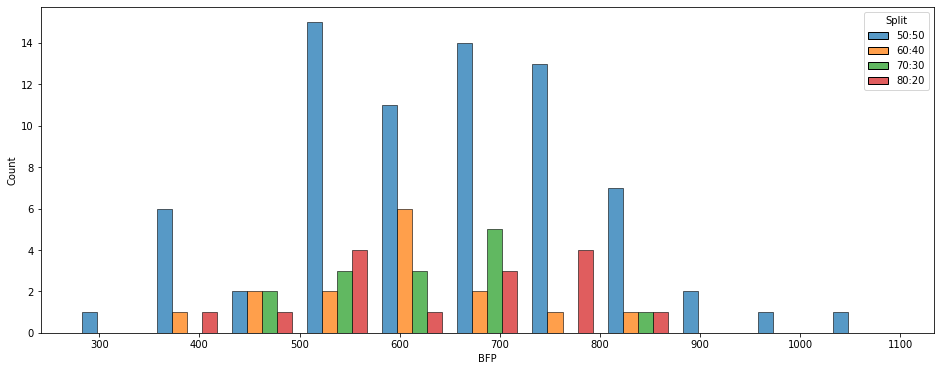

In [17]:
g = sns.histplot(data = split_df ,x= "BFP", hue='Split',  multiple="dodge", shrink=.8)
g.figure.set_size_inches(16,6)

### Fitting and evaluating models with different split ratios

In [18]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

def train_and_test_model(name, train, test):
    '''
    This method creates a model, trains it on the provided data, and assesses 
    it against the test data
    '''
    # This formula says that rescues_last_year is explained by weight_last_year
    formula = "BFP ~ Crude_Rands"

    # Create and train a linear regression model using the training data
    model = smf.ols(formula = formula, data = train).fit()

    # Now evaluate the model (by calculating the Mean Squared Error) using the 
    # corresponding "test" set for that split
    correct_answers = test['BFP']
    predictions = model.predict(test['Crude_Rands'])
    MSE = mse(correct_answers, predictions)
    print(name + ' MSE = %f ' % MSE)

    return model


# Train a model and test it for each kind of split
print("Mean Squared Error values (smaller is better)")
model_5050 = train_and_test_model("50:50", train_5050, test_5050)
model_6040 = train_and_test_model("60:40", train_6040, test_6040)
model_7030 = train_and_test_model("70:30", train_7030, test_7030)
model_8020 = train_and_test_model("80:20", train_8020, test_8020)

Mean Squared Error values (smaller is better)
50:50 MSE = 1309.203528 
60:40 MSE = 1258.624891 
70:30 MSE = 1355.302851 
80:20 MSE = 1295.757627 
